## Logistic Regression

In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
df = pd.read_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\spam.csv', delimiter=',',header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])

In [11]:
df.head()
print(df.shape)

(10, 2)


In [8]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(predictions)


['ham' 'ham' 'ham']


##  svm

In [13]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.logistic import LogisticRegression


In [14]:
def classifier():
    xx = np.linspace(1,10)
    yy = -regressor.coef_[0][0] / regressor.coef_[0][1] * xx - regressor.intercept_[0] / regressor.coef_[0][1]
    plt.plot(xx, yy)
    plt.scatter(x1,x2)
    plt.show()

In [15]:
x1 = [2,6,3,9,4,10]
x2 = [3,9,3,10,2,13]

In [16]:
X = np.array([[2,3],[6,9],[3,3],[9,10],[4,2],[10,13]])
y = [0,1,0,1,0,1]

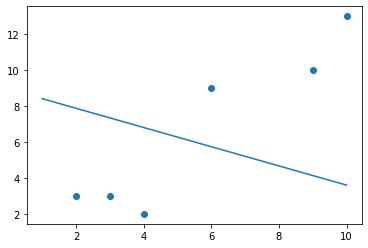

In [17]:
regressor = LogisticRegression()
regressor.fit(X,y)
classifier()

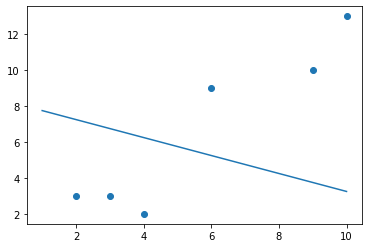

In [20]:
regressor = svm.SVC(kernel='linear',C = 1.0)
regressor.fit(X,y)
classifier()

## Decision  Tree

In [21]:
from sklearn.datasets import load_iris
import os
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from io import StringIO
import pydotplus
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\flowers.csv')
X = df[list(df.columns)[:-1]]
y = df['Flower']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)  

In [26]:
print(df.shape)
df.head()

(150, 5)


,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower
0,5.1,3.5,1.4,0.2,Rose
1,4.9,3.0,1.4,0.2,Rose
2,4.7,3.2,1.3,0.2,Rose
3,4.6,3.1,1.5,0.2,Rose
4,5.0,3.6,1.4,0.3,Rose


In [28]:
a = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=4, min_samples_leaf=5)  # entropy for information gain
a.fit(X_train, y_train) 
y_pred = a.predict(X_test) 
y_train.to_csv(r'C:\Users\NITHI\Documents\AlterSYS\Dataset\sss.csv')
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred)) 


Confusion Matrix:  [[15  1  0]
 [ 3  6  0]
 [ 0  0 13]]
Accuracy :  89.47368421052632
Report :                precision    recall  f1-score   support

      Jasmin       0.83      0.94      0.88        16
       Lotus       0.86      0.67      0.75         9
        Rose       1.00      1.00      1.00        13

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



In [32]:
dot_data = StringIO()
export_graphviz(a, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png(r"C:\Users\NITHI\Documents\AlterSYS\Dataset\decisiontree.png")

InvocationException: GraphViz's executables not found

In [33]:
b = RandomForestClassifier(max_depth = None, n_estimators=100)
b.fit(X_train,y_train)
y_pred = b.predict(X_test) 
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred)) 

Confusion Matrix:  [[15  1  0]
 [ 0  9  0]
 [ 0  0 13]]
Accuracy :  97.36842105263158
Report :                precision    recall  f1-score   support

      Jasmin       1.00      0.94      0.97        16
       Lotus       0.90      1.00      0.95         9
        Rose       1.00      1.00      1.00        13

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [34]:
export_graphviz(b.estimators_[5], out_file='tree.dot', feature_names = X_train.columns.tolist(),
                class_names = ['Lotus', 'Jasmin', 'Rose'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [35]:
                
os.system ("dot -Tpng tree.dot -o randomforest.png -Gdpi=600")
Image(filename = 'randomforest.png')
f = pd.Series(b.feature_importances_,index=X_train.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=f, y=f.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'randomforest.png'

## Naive Bayes

In [7]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [10]:
from sklearn import preprocessing
#creat labelEncoder
le = preprocessing.LabelEncoder()
wheather_encoded=le.fit_transform(weather)
print(wheather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [12]:
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label) 

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
##  Gaussian Classifier

In [16]:
features=zip(wheather_encoded,temp_encoded)
print(features)

In [38]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(features,label)

#Predict Output
predicted = model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

ValueError: Expected 2D array, got scalar array instead:
array=<zip object at 0x000002D038183F80>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.